In [1]:
library('igraph')
library("rjson")

Warning message:
"package 'igraph' was built under R version 3.3.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [10]:
uber_sf_geo = fromJSON(file = "san_francisco_censustracts.json")
uber_sf_geo_df = as.data.frame(uber_sf_geo)

In [18]:
uber_sf_geo_df

type,features.type,features.properties.MOVEMENT_ID,features.properties.DISPLAY_NAME,features.geometry.type,features.geometry.coordinates.c..121.595108..36.111261.,features.geometry.coordinates.c..121.540189..36.111498.,features.geometry.coordinates.c..121.500954..36.111686.,features.geometry.coordinates.c..121.501011..36.112702.,features.geometry.coordinates.c..121.461714..36.112177.,...,features.geometry.coordinates.c..121.232899..38.828072..1,features.geometry.coordinates.c..121.235107..38.825383..1,features.geometry.coordinates.c..121.2361..38.822061..1,features.geometry.coordinates.c..121.237899..38.820646..1,features.geometry.coordinates.c..121.240081..38.820239..1,features.geometry.coordinates.c..121.243212..38.820836..1,features.geometry.coordinates.c..121.247906..38.820889..1,features.geometry.coordinates.c..121.253665..38.819597..1,features.geometry.coordinates.c..121.256061..38.82368..1,features.geometry.coordinates.c..121.257205..38.82472..3
FeatureCollection,Feature,1,"Sargent Creek, San Ardo",MultiPolygon,-121.59511,-121.5402,-121.50095,-121.5010,-121.46171,...,-121.23290,-121.23511,-121.23610,-121.23790,-121.24008,-121.24321,-121.24791,-121.2537,-121.25606,-121.25720
FeatureCollection,Feature,1,"Sargent Creek, San Ardo",MultiPolygon,36.11126,36.1115,36.11169,36.1127,36.11218,...,38.82807,38.82538,38.82206,38.82065,38.82024,38.82084,38.82089,38.8196,38.82368,38.82472


In [20]:
uber_sf_geo_df = reshape(uber_sf_geo_df, direction="wide")

ERROR: Error in `[.data.frame`(data, , timevar): undefined columns selected


In [2]:
# QUESTION 6: Report the number of nodes and edges in G.

In [3]:
uber_graph = read_graph('december_data.csv',format='ncol',directed=FALSE)
components = decompose(uber_graph,min.vertices=10)
components

[[1]]
IGRAPH 07d21e4 UNW- 1898 321703 -- 
+ attr: name (v/c), weight (e/n)
+ edges from 07d21e4 (vertex names):
 [1] 73  --1982 1523--2213 433 --438  333 --448  315 --2231 605 --2202
 [7] 125 --2250 1728--1762 1748--1760 1743--1918 1750--1848 1648--1770
[13] 1538--1781 1690--2448 1691--2438 97  --624  83  --764  87  --724 
[19] 77  --824  2117--2344 1527--2403 2312--2437 64  --954  964 --1499
[25] 98  --614  1047--2451 91  --684  2157--2340 76  --834  2315--2407
[31] 2691--2694 1087--2349 1097--2348 2209--2487 918 --2408 937 --2218
[37] 927 --2318 275 --808  175 --818  195 --816  917 --2490 91  --675 
[43] 81  --676  61  --678  1417--2022 309 --2233 403 --1293 315 --2173
+ ... omitted several edges


In [4]:
# Because there's only one component with more than 10 vertices, this is probably the GCC
uber_gcc = components[[1]]

In [5]:
print(vcount(uber_gcc))
print(vcount(uber_graph))
print("We can see 7 nodes were removed")

[1] 1898
[1] 1905
[1] "We can see 7 nodes were removed"


In [6]:
# Write the graph to file
write_graph(uber_gcc,'uber_gcc.txt',format="ncol")

In [7]:
print(paste("Number of nodes: ", vcount(uber_gcc)))
print(paste("Number of edges: ", ecount(uber_gcc)))

[1] "Number of nodes:  1898"
[1] "Number of edges:  321703"


In [8]:
# QUESTION 7: Build a minimum spanning tree (MST) of graph G. Report the street addresses
# of the two endpoints of a few edges. Are the results intuitive?

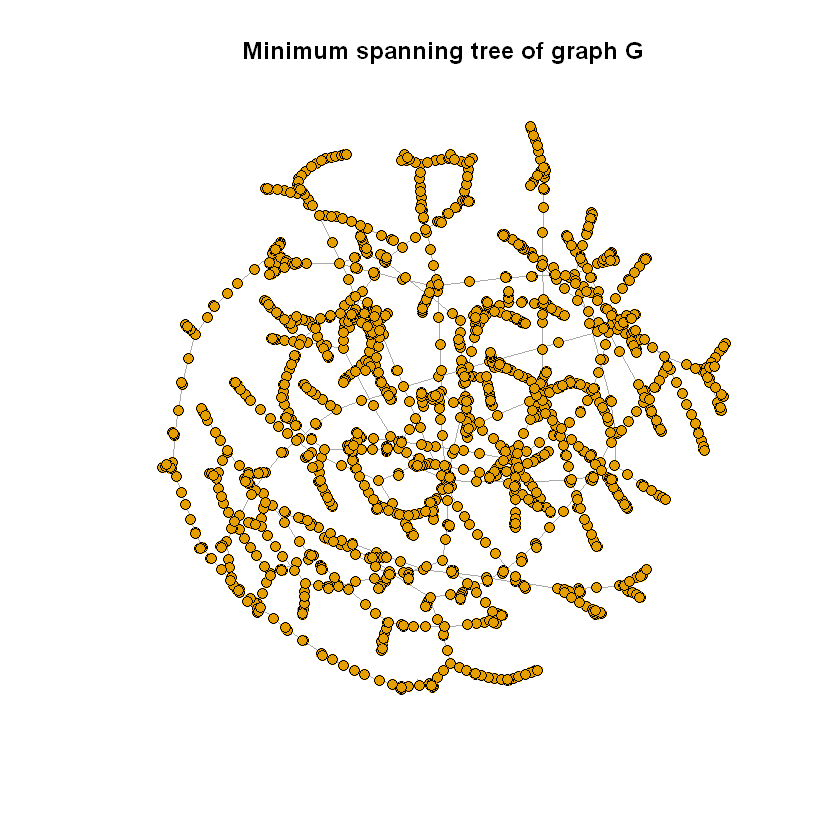

In [9]:
g_mst = mst(uber_gcc)
plot(g_mst, vertex.size=4, vertex.label=NA, main="Minimum spanning tree of graph G")

In [ ]:
import random

max_index = len(gcc.vs()) - 1 # 1879
gcc_vertices = gcc.vs()
num_of_experience = 1000
used_combine = set()
i = 0

num_of_satisfy = 0
while i < num_of_experience:
    cur_combine = ()
    while True:
        indices = set()
        while len(indices) < 3:
            indices.add(random.randint(0,max_index))
        li = list(indices)
        li.sort()
        cur_combine = tuple(li)
        if not cur_combine in used_combine:
            used_combine.add(cur_combine)
            break
    
    edges = gcc.es.select(_within = cur_combine)
    if len(edges) < 3:
        continue
    num = 'experience ' + str(i)
    i += 1
    print(num.center(90, '='))
    count = 1
    weights = []
    for edge in edges:
        weights.append(edge['weight'])
        st = edge.tuple
        print('edge '+str(count)+': ' + str(gcc_vertices[st[0]]['display name']) + \
              ' -- ' + str(gcc_vertices[st[1]]['display name']))
        print('weight: ' + str(edge['weight']))
        count += 1
        print()
    if weights[0] + weights[1] > weights[2] and weights[2] + weights[1] > weights[0] and \
    weights[0] + weights[2] > weights[1]:
        print('satisfy the triangle inequality')
        num_of_satisfy += 1
    else:
        print('not satisfy the triangle inequality')
print(90 * '=')
print('satisfying rate: ' + str(num_of_satisfy / num_of_experience))